# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
url = 'https://api.openweathermap.org/data/2.5/weather?&q=London&appid=' + weather_api_key

response = requests.get(url)
weather_data = response.json()

weather_response = requests.get(url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")


The weather API responded with: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.89, 'feels_like': 284.47, 'temp_min': 283.62, 'temp_max': 285.81, 'pressure': 1018, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1676604423, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1676617892, 'sunset': 1676654270}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}.


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ='http://api.openweathermap.org/data/2.5/weather?' 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | losone
Processing Record 11 of Set 1 | samarai
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | omsukchan
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | yenagoa
Processing Record 17 of Set 1 | taldan
Processing Record 18 of Set 1 | itoman
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | labuhan
Processing Record 22 of Set 1 | beringovskiy
Processin

Processing Record 34 of Set 4 | atikokan
Processing Record 35 of Set 4 | general roca
Processing Record 36 of Set 4 | tongliao
Processing Record 37 of Set 4 | nome
Processing Record 38 of Set 4 | puerto madero
Processing Record 39 of Set 4 | vetluga
Processing Record 40 of Set 4 | xai-xai
Processing Record 41 of Set 4 | antofagasta
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | lucapa
Processing Record 45 of Set 4 | moisei
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | kuala terengganu
Processing Record 49 of Set 4 | manfredonia
Processing Record 0 of Set 5 | tuktoyaktuk
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | gwadar
Processing Record 3 of Set 5 | ahuimanu
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | vikhorevka
Processing Record 6 of Set 5 | handwara
City not found. S

Processing Record 28 of Set 8 | helong
Processing Record 29 of Set 8 | diamantino
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | aranos
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | sangmelima
Processing Record 34 of Set 8 | thiers
Processing Record 35 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | royan
Processing Record 38 of Set 8 | kudchi
City not found. Skipping...
Processing Record 39 of Set 8 | ayni
Processing Record 40 of Set 8 | itacare
Processing Record 41 of Set 8 | noumea
Processing Record 42 of Set 8 | zhanaozen
Processing Record 43 of Set 8 | vestmannaeyjar
Processing Record 44 of Set 8 | dalton
Processing Record 45 of Set 8 | lahij
Processing Record 46 of Set 8 | missoula
Processing Record 47 of Set 8 | poum
Processing Record 48 of Set 8 | khandagayty
Processing Record 49 of Set 8 | texas city
Processing Record 0 of Set 

Processing Record 17 of Set 12 | ghanzi
Processing Record 18 of Set 12 | birao
Processing Record 19 of Set 12 | kaitangata
Processing Record 20 of Set 12 | nongstoin
Processing Record 21 of Set 12 | bagru
Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | sudbury
Processing Record 24 of Set 12 | tucuma
Processing Record 25 of Set 12 | touba
Processing Record 26 of Set 12 | shubarkuduk
Processing Record 27 of Set 12 | lander
Processing Record 28 of Set 12 | simbakoro
Processing Record 29 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 30 of Set 12 | necochea
Processing Record 31 of Set 12 | hihifo
City not found. Skipping...
Processing Record 32 of Set 12 | chapaevsk
Processing Record 33 of Set 12 | kasama
Processing Record 34 of Set 12 | karari
Processing Record 35 of Set 12 | maine-soroa
Processing Record 36 of Set 12 | kalmunai
Processing Record 37 of Set 12 | monchegorsk
Processing Record 38 of Set 12 | lososina
Processing Record 39 of Set 12

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,299.38,47,0,8.23,AU,1676605023
1,port alfred,-33.5906,26.8910,293.81,96,91,0.45,ZA,1676605024
2,ahipara,-35.1667,173.1667,293.73,64,29,5.06,NZ,1676605024
3,barrow,71.2906,-156.7887,249.16,77,100,3.60,US,1676605025
4,albany,42.6001,-73.9662,281.38,83,100,0.45,US,1676604902


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,299.38,47,0,8.23,AU,1676605023
1,port alfred,-33.5906,26.8910,293.81,96,91,0.45,ZA,1676605024
2,ahipara,-35.1667,173.1667,293.73,64,29,5.06,NZ,1676605024
3,barrow,71.2906,-156.7887,249.16,77,100,3.60,US,1676605025
4,albany,42.6001,-73.9662,281.38,83,100,0.45,US,1676604902


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

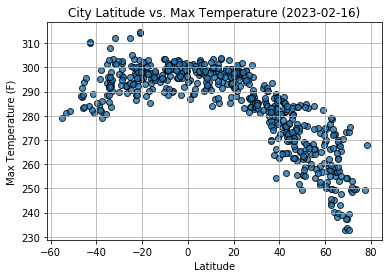

In [9]:
# Build scatter plot for latitude vs. temperature

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis,edgecolor="black", marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (%s)"  % time.strftime("%Y-%m-%d"))
plt.grid(True)


# Save the figure
plt.savefig("Output_Data/latitude vs. temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

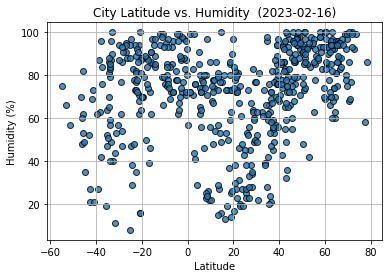

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis,edgecolor="black", marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity  (%s)" % time.strftime("%Y-%m-%d"))
    
plt.grid(True)


# Save the figure
plt.savefig("Output_Data/latitude vs. humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

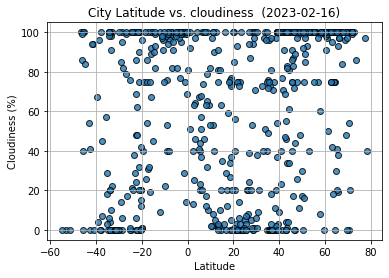

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis,edgecolor="black", marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. cloudiness  (%s)" % time.strftime("%Y-%m-%d"))
    
plt.grid(True)


# Save the figure
plt.savefig("Output_Data/latitude vs. cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

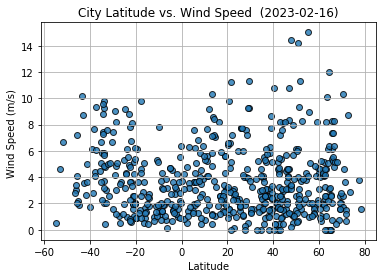

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis,edgecolor="black", marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s) ")
plt.title("City Latitude vs. Wind Speed  (%s)" % time.strftime("%Y-%m-%d"))
    
plt.grid(True)


# Save the figure
plt.savefig("Output_Data/latitude vs. wind speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Northern_Hemisphere_dataframe =  city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
Northern_Hemisphere_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,barrow,71.2906,-156.7887,249.16,77,100,3.60,US,1676605025
4,albany,42.6001,-73.9662,281.38,83,100,0.45,US,1676604902
6,ponta do sol,32.6667,-17.1000,291.32,63,73,3.84,PT,1676605026
8,losone,46.1687,8.7593,280.82,96,17,2.20,CH,1676605027
11,omsukchan,62.5333,155.8000,244.12,95,100,3.22,RU,1676605029


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_Hemisphere_dataframe =  city_data_df[city_data_df["Lat"]< 0]

# Display sample data

Southern_Hemisphere_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,299.38,47,0,8.23,AU,1676605023
1,port alfred,-33.5906,26.8910,293.81,96,91,0.45,ZA,1676605024
2,ahipara,-35.1667,173.1667,293.73,64,29,5.06,NZ,1676605024
5,mataura,-46.1927,168.8643,287.86,48,86,3.01,NZ,1676605026
7,luderitz,-26.6481,15.1594,289.39,88,17,3.62,NaN,1676605027


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: -0.8629878396815258


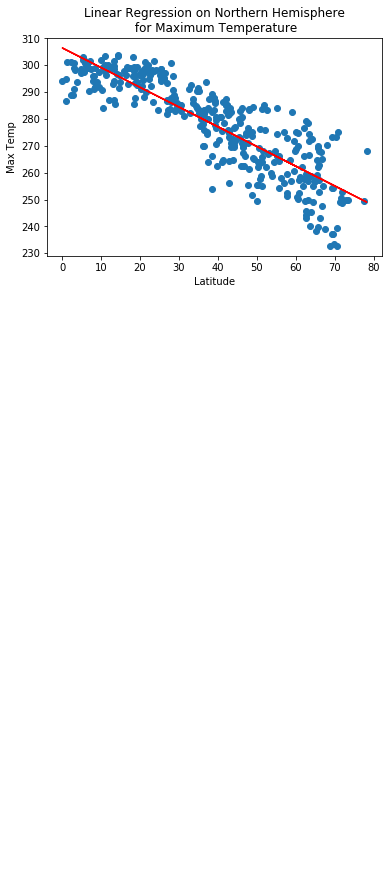

In [17]:
x_values = Northern_Hemisphere_dataframe["Lat"]
y_values = Northern_Hemisphere_dataframe["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression on Northern Hemisphere\n for Maximum Temperature')
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.3946842228026141


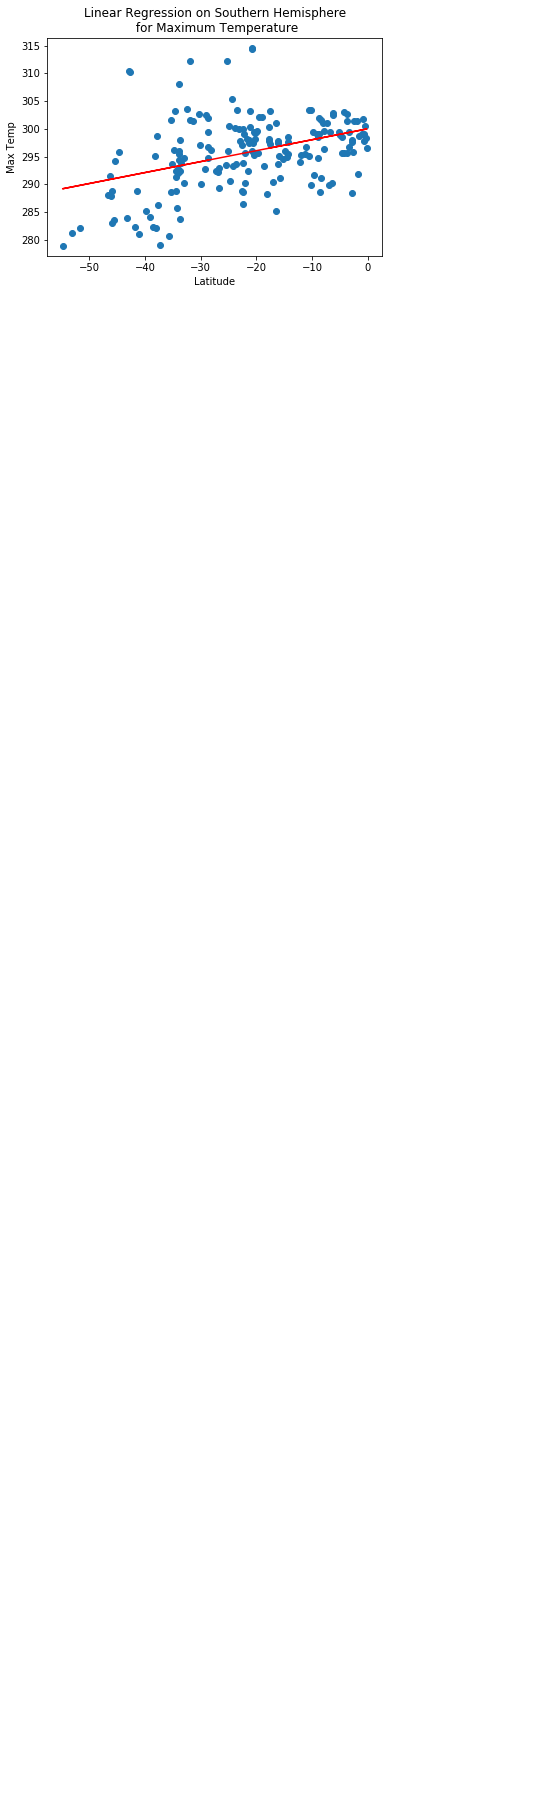

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = Southern_Hemisphere_dataframe["Lat"]
y_values = Southern_Hemisphere_dataframe["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression on Southern Hemisphere\n for Maximum Temperature')
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:**  In the Northern hemisphere if the latitude is  0 then it reaches the highest/maximum temparature but for Southern Hemisphere at 0 latitude the avaerage mainatined temperature is between 300 and 305

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4876468751626126


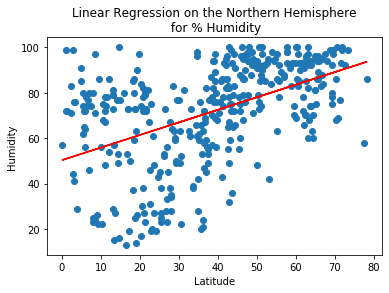

In [19]:
# Northern Hemisphere
x_values = Northern_Hemisphere_dataframe["Lat"]
y_values = Northern_Hemisphere_dataframe["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on the Northern Hemisphere\n for % Humidity')
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.40087598789269496


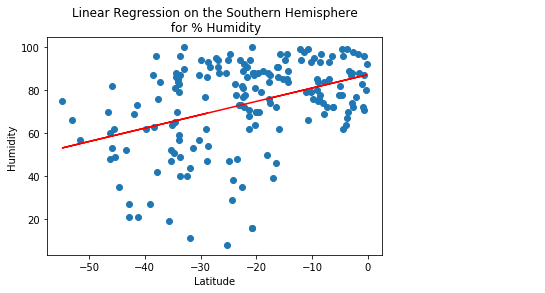

In [20]:
# Southern Hemisphere
x_values = Southern_Hemisphere_dataframe["Lat"]
y_values = Southern_Hemisphere_dataframe["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on the Southern Hemisphere\n for % Humidity')
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:**  In northern Hemisphere the corelation between the latitude and % of humidity is that the farther the distance from latitude the % of humidity increases whereas in Southern hemisphere the farther the distance from latitude the % of humidity decreases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3632436633964797


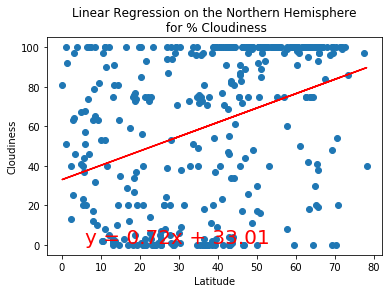

In [21]:
# Northern Hemisphere
x_values = Northern_Hemisphere_dataframe["Lat"]
y_values = Northern_Hemisphere_dataframe["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on the Northern Hemisphere\n for % Cloudiness')
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.3924735765118742


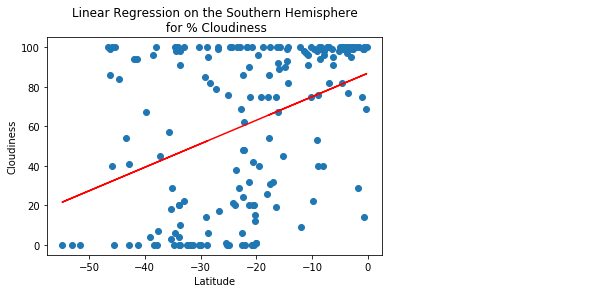

In [22]:
# Southern Hemisphere
x_values = Southern_Hemisphere_dataframe["Lat"]
y_values = Southern_Hemisphere_dataframe["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on the Southern Hemisphere\n for % Cloudiness')
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** In the linear regression plotted between latitude and cloudiness, for both the Hemisphere the farther the distance from 0 Latitude the cloudiness decreases. It is more cloudy closer to the 0 degree latitude. The correlation coefficient value indicates almost the same  r value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.3605405085934473


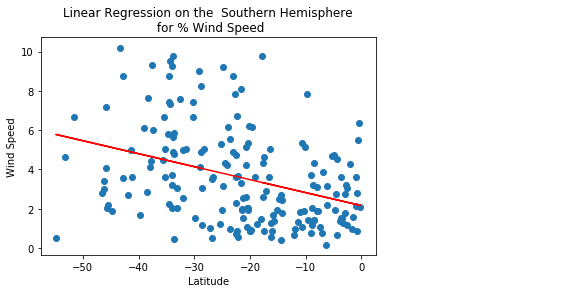

In [23]:
# Northern Hemisphere
x_values = Southern_Hemisphere_dataframe["Lat"]
y_values = Southern_Hemisphere_dataframe["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on the  Southern Hemisphere\n for % Wind Speed')
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.004482172085367609


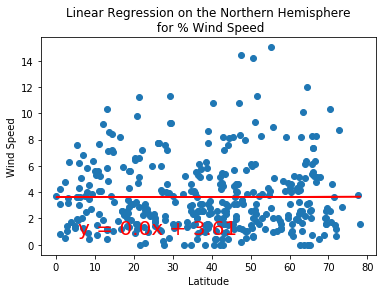

In [24]:
# Southern Hemisphere
x_values = Northern_Hemisphere_dataframe["Lat"]
y_values = Northern_Hemisphere_dataframe["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on the Northern Hemisphere\n for % Wind Speed')
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The coefficients is both the hemisphere have less than 0 or 0 value suggesting that both the values have weak linear relationship. 